## IMPLEMENTAÇÃO DO MODELO - DECISION TREE

In [3]:
#Importação de bibliotecas necessárias para o projeto
import numpy as np
import pandas as pd
from IPython.display import display # Permite o uso de display() para DataFrames
from pandas import DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import pylab as plt
import scipy as scipy
import missingno as msno
from scipy.stats.stats import pearsonr
from collections import Counter
import seaborn as sns
from sklearn.model_selection import cross_val_score #cross-validation
from sklearn import metrics
# Pretty display for notebooks
%matplotlib inline

# Carregando os conjuntos de dados de treinamento e teste
full_data = pd.read_csv('train_Porto_Seguro.csv') 
full_data_test= pd.read_csv('test_Porto_Seguro.csv')

# Imprime as primeiras entradas dos datasets
display(full_data.head(10))
display(full_data_test.head(10))

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
5,19,0,5,1,4,0,0,0,0,0,...,4,2,0,9,0,1,0,1,1,1
6,20,0,2,1,3,1,0,0,1,0,...,3,0,0,10,0,1,0,0,1,0
7,22,0,5,1,4,0,0,1,0,0,...,7,1,3,6,1,0,1,0,1,0
8,26,0,5,1,3,1,0,0,0,1,...,4,2,1,5,0,1,0,0,0,1
9,28,1,1,1,2,0,0,0,1,0,...,3,5,0,6,0,1,0,0,1,0


,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1
5,5,0,1,6,0,0,1,0,0,0,...,8,1,4,9,1,0,1,0,1,0
6,6,0,1,3,0,0,0,1,0,0,...,2,0,4,6,1,1,0,0,0,0
7,8,0,1,0,0,0,1,0,0,0,...,3,1,4,9,0,1,0,0,0,0
8,10,0,1,7,0,0,0,1,0,0,...,5,1,4,6,0,0,1,0,0,0
9,11,1,1,6,0,0,0,0,0,1,...,6,1,6,10,0,1,1,0,0,0


In [4]:
# Padronização da impressão dos gráficos
padrao={'savefig.dpi': 75, 'figure.autolayout': False, 'figure.figsize': [20, 8], 'axes.labelsize': 18,\
   'axes.titlesize': 18, 'font.size': 18, 'lines.linewidth': 2.0, 'lines.markersize': 8, 'legend.fontsize': 20,\
   'xtick.labelsize': 12, 'ytick.labelsize': 16} 
 
sns.set(style='dark',rc=padrao) 

### Função grafico_auc - retorna o gráfico com a curva AUC e seu valor.

In [5]:
def grafico_auc(modelo):
    #Utilização da função predict.proba para obter estimativas de incerteza para o classificador.
    fpr, tpr, _ = metrics.roc_curve(y_test, modelo.predict_proba(X_test)[:,1])

    # Cálculo da métrica AUC
    auc = cross_val_score(modelo, X_test, y_test, cv=5, scoring='roc_auc')
    roc_auc=auc.mean()

    # Gráfico da curva ROC
    plt.figure()
    plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('AUC(Area Under The Curve)')
    plt.legend(loc="lower right")
    plt.show()

### Função pontuação - retorna as pontuações dos folds da validação cruzada;a pontuação de AUC e GINI

In [6]:
def pontuacao(modelo):
    #Alteração do parâmetro cv=5 e scoring="roc_auc).
    auc = cross_val_score(modelo, X_test, y_test, cv=5, scoring='roc_auc')

    #Calculando a média dos 5 folds construídos na etapa anterior.
    media=auc.mean()
    
    #Print das pontuações
    print("Pontuações da Validação Cruzada: {}".format(auc))
    print("Pontuação AUC: {:.3f}".format(media))
    print("Pontuação Gini: " , 2 * media - 1)


In [7]:
#armazenamento dos dados nas variáveis X e y. Retirando a variável "target",pois esta vai ser a variável alvo.
X = full_data.drop(['target',"id"], axis=1)
y = full_data['target']

In [8]:
#Importação da técnica StardandScaler para normalização dos dados. Será necessário a utilização dessa técnica para poder
#treinar o algoritmo
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

In [9]:
type(X)

numpy.ndarray

### Implementação: Divisão dos Dados de Treinamento e Teste

In [10]:
#importação da técnica StratifiedKFold
from sklearn.model_selection import StratifiedKFold

#Divisão do conjunto de dados de treinamento em: conjunto de treinamento e teste
skf = StratifiedKFold(n_splits=3,random_state=2017,shuffle=True)

for train_index, test_index in skf.split(X, y):
    print("train:", train_index, "Train:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

train: [     0      1      2 ..., 595208 595210 595211] Train: [     3      4      8 ..., 595203 595206 595209]
train: [     2      3      4 ..., 595209 595210 595211] Train: [     0      1      7 ..., 595204 595207 595208]
train: [     0      1      3 ..., 595207 595208 595209] Train: [     2      5      6 ..., 595205 595210 595211]


In [11]:
#importação da biblioteca tree para o modelo de Decision Tree
from sklearn import tree

#Criação do primeiro classificador. 
clf1 = tree.DecisionTreeClassifier(random_state=2017)
clf1.fit(X_train, y_train)  

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=2017, splitter='best')

In [12]:
pontuacao(clf1)

Pontuações da Validação Cruzada: [ 0.50477877  0.50625665  0.50614564  0.50212242  0.50426981]
Pontuação AUC: 0.505
Pontuação Gini:  0.00942931480516


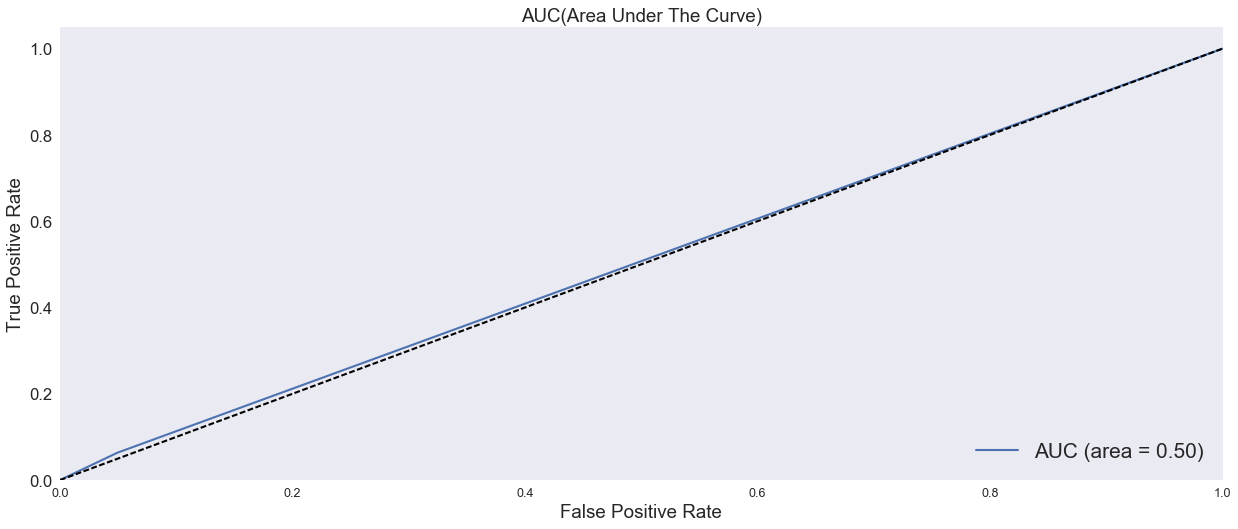

In [13]:
grafico_auc(clf1)

In [14]:
#importação da biblioteca tree para o modelo de Decision Tree
from sklearn import tree
#realizando a alteração de alguns parâmetros para melhorar o score
clf2_parametros = { 'max_depth' : 6 ,'min_samples_split': 60 ,'min_samples_leaf':  25}

clf2 = tree.DecisionTreeClassifier(**clf2_parametros,random_state=2017) #deixando o default gini
clf2.fit(X_train, y_train)  

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=25,
            min_samples_split=60, min_weight_fraction_leaf=0.0,
            presort=False, random_state=2017, splitter='best')

In [15]:
pontuacao(clf2)

Pontuações da Validação Cruzada: [ 0.60852186  0.59387595  0.5980788   0.59957734  0.59986764]
Pontuação AUC: 0.600
Pontuação Gini:  0.199968632405


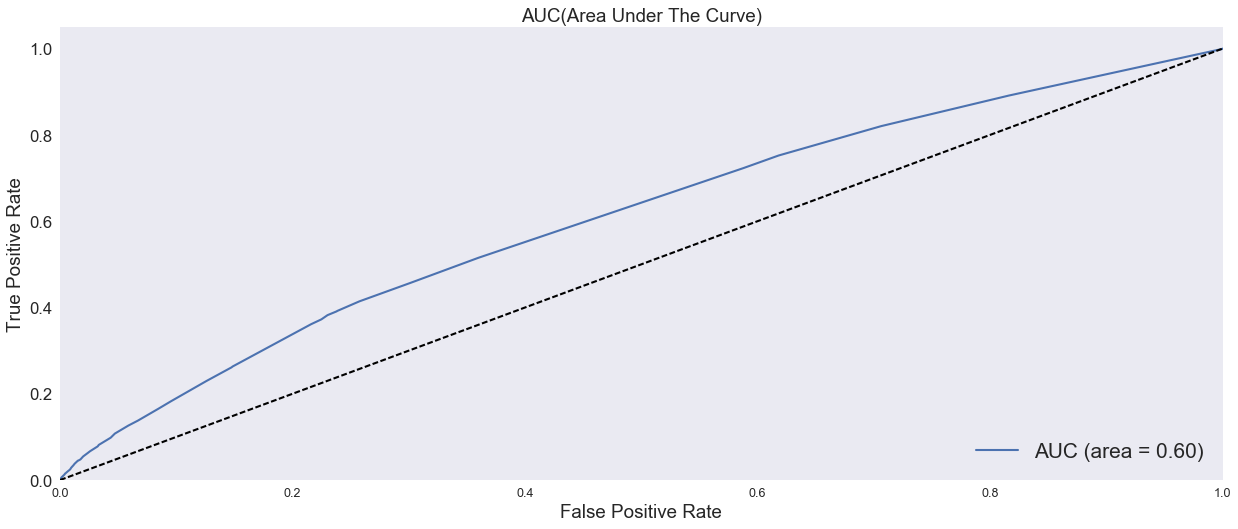

In [16]:
grafico_auc(clf2)

In [17]:
#armazenando os valores da coluna id do teste
id_test = full_data_test['id'].values
#Excluindo a váriavel "id" do conjunto de testes também.
full_data_test=full_data_test.drop(['id'], axis = 1)

In [18]:
submission=pd.DataFrame(columns=['id','target'])
submission['target']=clf2.predict_proba(full_data_test)[:,1]
submission['id']=id_test
submission.to_csv("sample_submission_clf1.csv", index=False)
pd.read_csv('sample_submission_clf1.csv')

,id,target
0,0,0.049355
1,1,0.049355
2,2,0.049355
3,3,0.049355
4,4,0.049355
5,5,0.049355
6,6,0.049355
7,8,0.049786
8,10,0.049355
9,11,0.049355


In [19]:
submission=pd.DataFrame(columns=['id','target'])
submission['target']=clf2.predict_proba(full_data_test)[:,1]
submission['id']=id_test
submission.to_csv("sample_submission_clf2.csv", index=False)
pd.read_csv('sample_submission_clf2.csv')

,id,target
0,0,0.049355
1,1,0.049355
2,2,0.049355
3,3,0.049355
4,4,0.049355
5,5,0.049355
6,6,0.049355
7,8,0.049786
8,10,0.049355
9,11,0.049355


In [20]:

y_saida=reg.predict(X_test)

NameError: name 'reg' is not defined